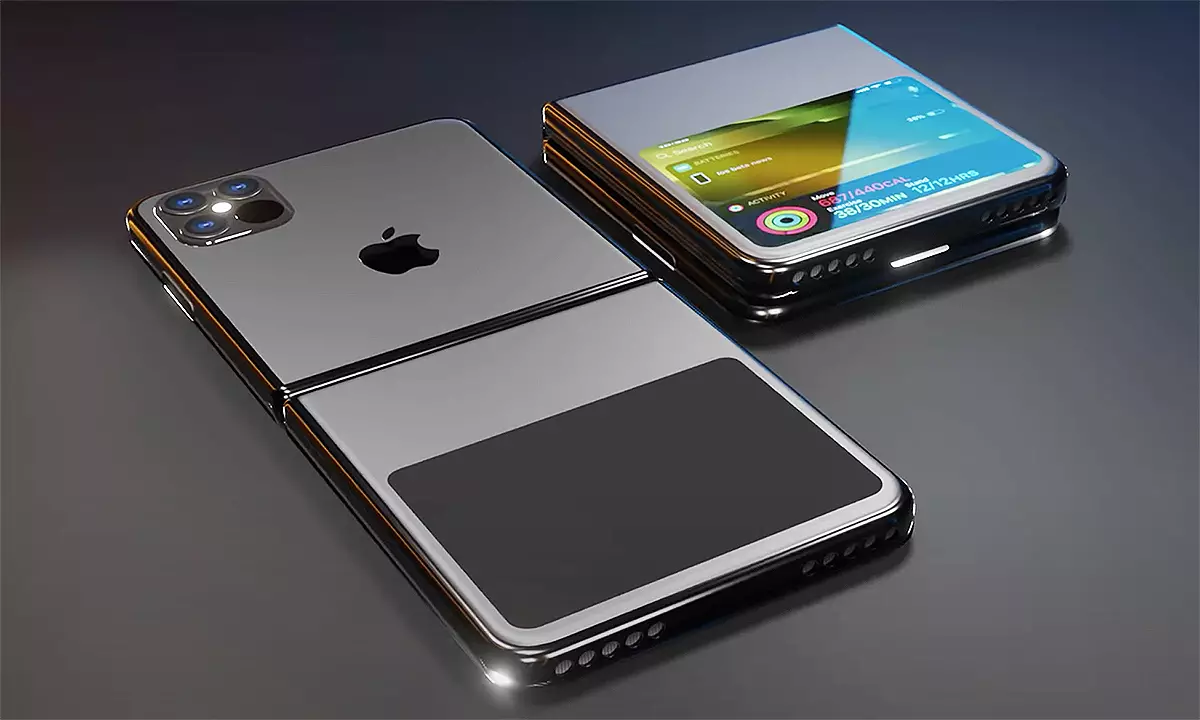

### Load & read the data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [8]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\apple_products.csv')
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [9]:
print("Shape {} & Size {}".format(df.shape,df.size))

Shape (62, 11) & Size 682


In [11]:
print("Data types")
df.dtypes

Data types


Product Name            object
Product URL             object
Brand                   object
Sale Price               int64
Mrp                      int64
Discount Percentage      int64
Number Of Ratings        int64
Number Of Reviews        int64
Upc                     object
Star Rating            float64
Ram                     object
dtype: object

In [12]:
print('Information')
df.info()

Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [13]:
print("Descriptive Statistics")
df.describe()

Descriptive Statistics


,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


### Missing values

In [14]:
df.isna().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

**NO missing values.**

### Exploratory Data Analysis

### Lets check the Range of rating i.e whether it is 5 Start or 10 Start rating.

In [17]:
df['Star Rating'].unique()

array([4.6, 4.5, 4.7])

- Rating system is 5 Star.
- Ratings of iPhone are very good.

### Average Rating.

In [22]:
print("Average Rating of iPhone is : ", df['Star Rating'].mean())

Average Rating of iPhone is :  4.575806451612904


### What are different RAM type

In [18]:
df.Ram.unique()

array(['2 GB', '4 GB', '3 GB', '6 GB'], dtype=object)

- Data contains iPhone with RAM 2, 3, 4 & 6GB

### Which iPhone product has highest Sale Price

In [28]:
top_5=pd.pivot_table(data=df, index='Product Name', 
               values=['Mrp','Sale Price'], 
               aggfunc=sum).sort_values(by='Sale Price', ascending=False)[:5]
top_5

,Mrp,Sale Price
Product Name,,
"APPLE iPhone 12 Pro (Silver, 512 GB)",149900,140900
"APPLE iPhone 12 Pro (Pacific Blue, 512 GB)",149900,140900
"APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)",131900,131900
"APPLE iPhone 11 Pro Max (Gold, 256 GB)",131900,131900
"APPLE iPhone 12 Pro Max (Silver, 256 GB)",139900,130900


In [29]:
figure=px.bar(data_frame=top_5,
             y=top_5.index,
             x='Sale Price',
             title='Sales of iPhone Products')
figure.show()

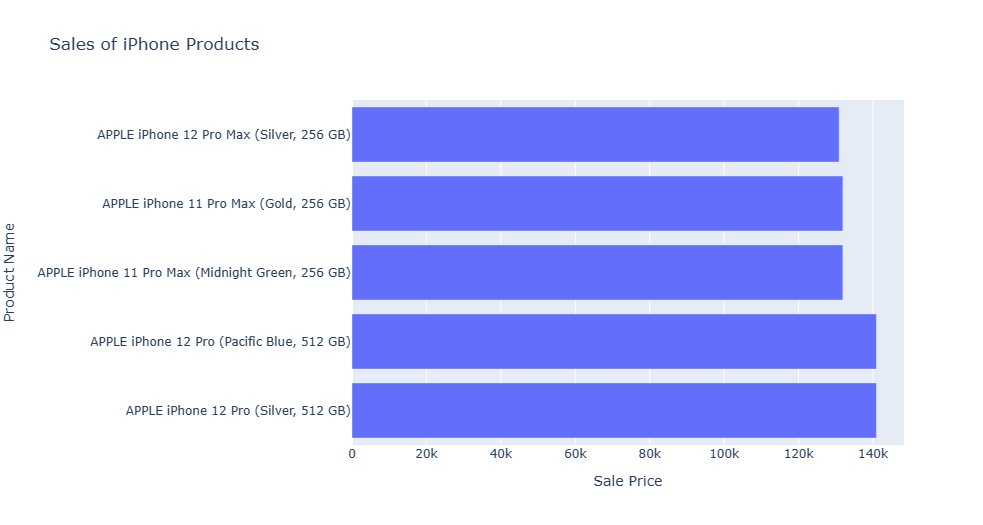

- APPLE iPhone 12 Pro (Silver, 512 GB) & APPLE iPhone 12 Pro (Pacific Blue, 512 GB) Have highest selling price

### Which Product got maximum Ratings from Buyers?

In [31]:
rating=pd.pivot_table(data=df, index='Product Name', 
               values=['Number Of Ratings','Number Of Reviews'], 
               aggfunc=sum).sort_values(by='Number Of Ratings', ascending=False)[:5]
rating

,Number Of Ratings,Number Of Reviews
Product Name,,
"Apple iPhone SE (White, 256 GB) (Includes EarPods, Power Adapter)",95909,8161
"APPLE iPhone SE (Red, 128 GB)",95909,8161
"APPLE iPhone SE (Black, 64 GB)",95909,8161
"APPLE iPhone SE (Black, 128 GB)",95909,8161
"APPLE iPhone SE (White, 64 GB)",95807,8154


In [33]:
figure=px.bar(data_frame=rating,
             y=rating.index,
             x='Number Of Ratings',
             title='Ratings of iPhone Products')
figure.show()

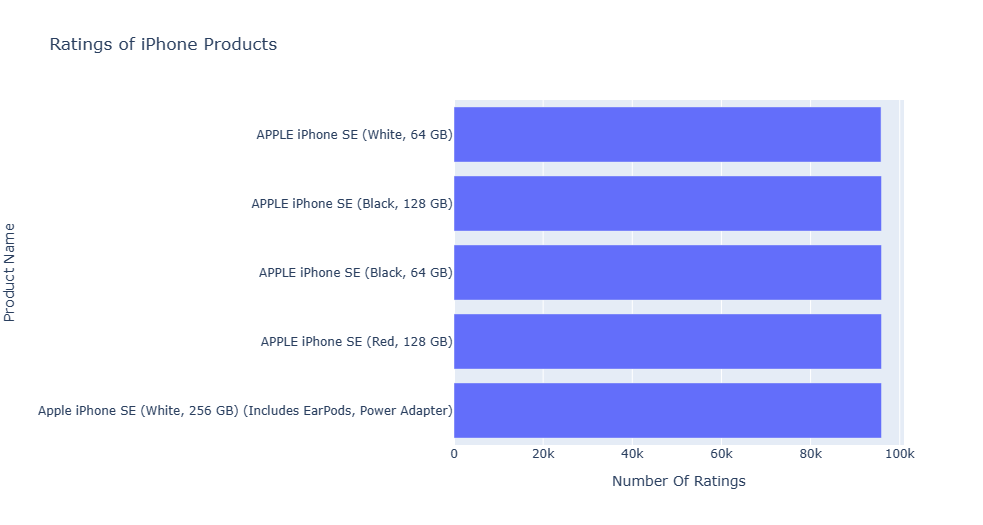

- Above 5 Products got Overall Highest Rating.

### Top 5 Highest Rated Products?

In [55]:
star_rating=pd.pivot_table(data=df, index='Product Name', 
               values=['Star Rating'], 
               aggfunc=sum).sort_values(by='Star Rating', ascending=False)[:5]
star_rating

,Star Rating
Product Name,
"APPLE iPhone 11 Pro Max (Gold, 64 GB)",4.7
"APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)",4.7
"APPLE iPhone 11 Pro Max (Space Grey, 64 GB)",4.7
"APPLE iPhone 11 Pro Max (Gold, 256 GB)",4.7
"APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)",4.7


In [56]:
figure=px.bar(data_frame=star_rating,
             y=star_rating.index,
             x='Star Rating',
             title='Ratings of iPhone Products')
figure.show()

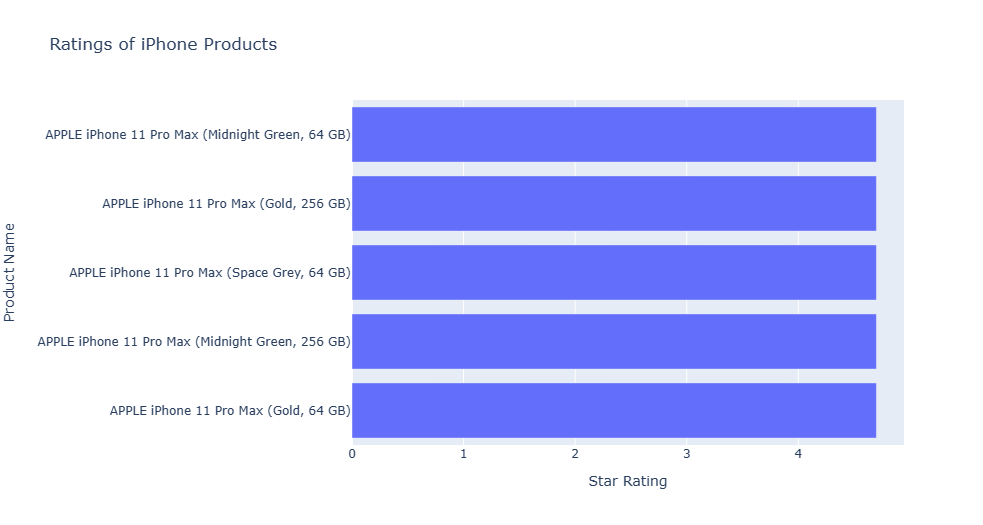

### Relationship Between Selling Price & Number of Ratings

In [46]:
figure = px.scatter(data_frame = df, x="Number Of Ratings",
                    y="Sale Price", size="Discount Percentage", 
                    trendline="ols", 
                    title="Relationship between Sale Price and Number of Ratings of iPhones")
figure.show()

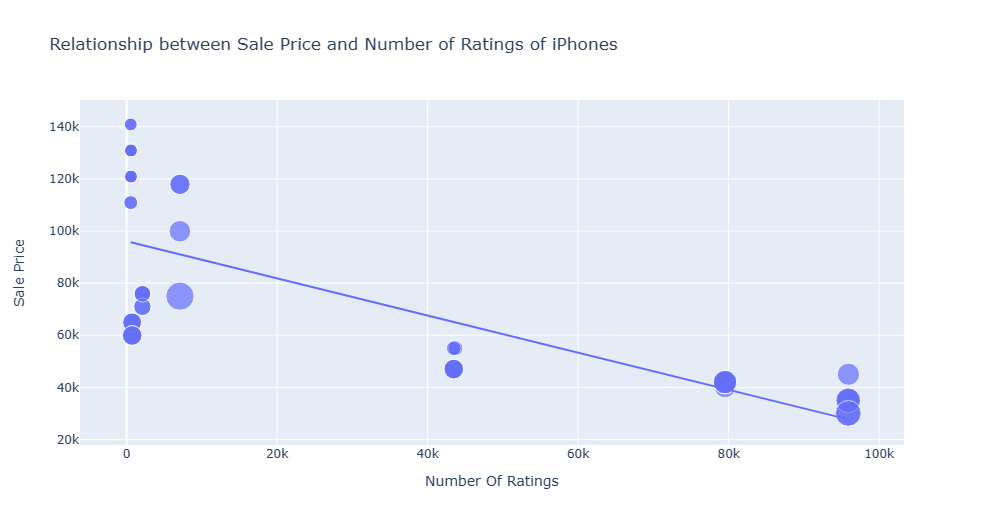

**As the Selling Price going Up the Ratings Going Down.**

### Relationship between percentage discount & number of ratings

In [47]:
figure = px.scatter(data_frame = df, x="Number Of Ratings",
                    y="Discount Percentage", size="Sale Price", 
                    trendline="ols", 
                    title="Relationship between Discount Percentage and Number of Ratings of iPhones")
figure.show()

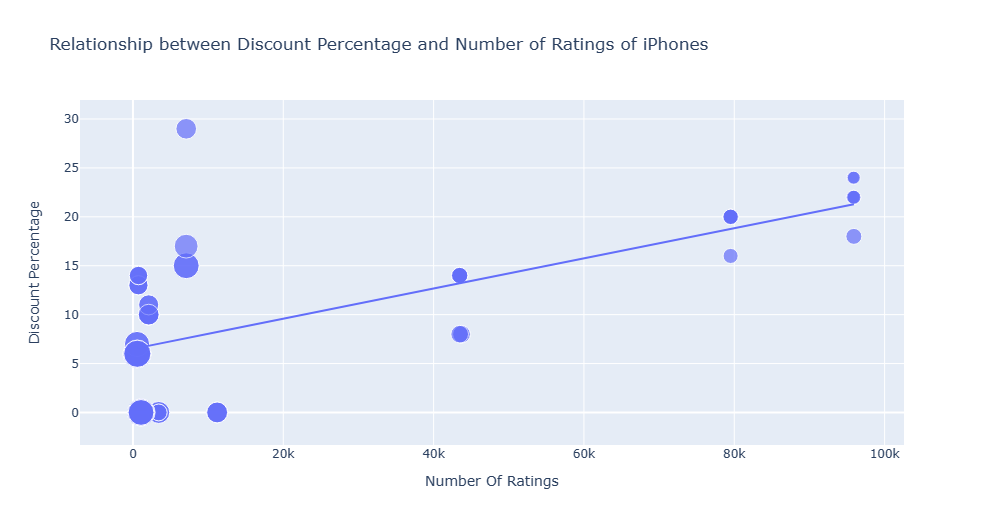

**As the Discount Percentage increases the Number of Ratings Increases, that means Buyer are more attracted towards Discount.**

### Conclusion:

**1. APPLE iPhone 12 Pro 512 GB Silver & Pacific Blue Has Highest Selling Price**

**2. APPLE iPhone SE got highest overall ratings.**

**3. APPLE 11 Pro Max got 4.7/5.0 Ratings.**

**4. Users Buying Low Price iPhone And hence the Ratings Are High for Low Budget iPhones.**

**4. Buyers more atrracted towards Discount, Ratings are positively depends on Discount.**